## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 8.67362789 15.53446991 31.79948374 43.58219088 38.07454943 50.18448821
 53.43912045 57.85501574 61.99059886 47.0551468  56.45313544 66.18748588
 65.18161833 60.03006339 74.41858714 58.37752359 71.36636617 90.13924183
 73.07065559 78.07259955]


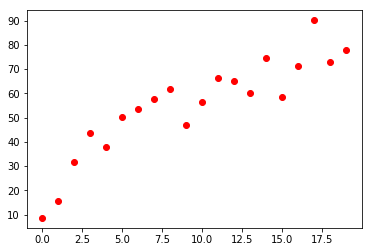

In [1]:
# you code here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.asarray(range(20))
y = 3.4 * X + 5.6 + np.random.random(20) * 30
print(X,y)
plt.scatter(X,y,color='r')

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [3]:
reg.score(X.reshape(-1, 1), y)

0.8008978080285423

In [4]:
reg.coef_

array([3.06705574])

In [5]:
reg.intercept_

25.93726888552938

In [6]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

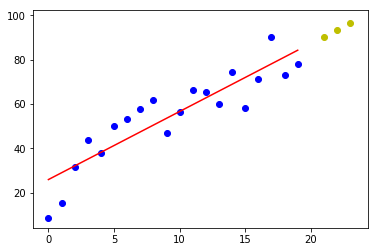

In [7]:
xx = np.asarray([21,22,23])
yy = reg.predict(xx.reshape(-1,1))
plt.scatter(X, y, color='b')
plt.scatter(xx,yy,color='y')
plt.plot(X, f(X), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [8]:
# you code here
from scipy.spatial.distance import cosine

In [9]:
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

def distance(x1, x2):
    return cosine(x1, x2)

def predict(x, k=5):
    # 在predicate的时候，需要做大量的计算
#     most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    most_similars = sorted(model(X, y), key=lambda xi: abs(xi[0] - x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [10]:
myself_knn = model(X, y)

[(3, 43.5821908849128), (4, 38.074549425765596), (2, 31.79948374015893), (5, 50.184488207113844), (1, 15.534469905730287)]
[(12, 65.18161832985098), (13, 60.03006338956298), (11, 66.1874858788953), (14, 74.41858713622187), (10, 56.453135439466976)]
[(18, 73.07065559165645), (17, 90.13924182774194), (19, 78.07259955137184), (16, 71.36636617232826), (15, 58.37752358782443)]


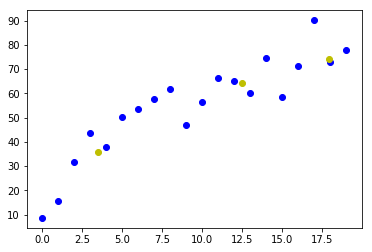

In [11]:
xx = np.asarray([3.5,  12.5, 17.9])
yy = [predict(x) for x in xx]
plt.scatter(X, y, color='b')
plt.scatter(xx, yy,color='y')

In [12]:
cosine(1, 0.9)

0.0

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [13]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [14]:
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [35]:
from collections import Counter
from icecream import ic
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [18]:
# entropy([1,1,0])
entropy([0,0])

ic| probs: [1.0]


-0.0

In [57]:
def find_the_optimal_spliter(training_data: pd.DataFrame, target: str) -> str:
    # 用于分类的列名
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    # 初始化为最大值
    min_entropy = float('inf')
    
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
#         ic(values)
        for v in values:
            # f列值为v的标签值
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
#             ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)
            # f列值不为v的标签值
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
#             ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)
            # 计算以f列的v值分类后的熵
            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)
            # 保留最小熵以及对应的列名和值
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [62]:
def get_optimal_spliter(training_data: pd.DataFrame, target: str):
    if entropy(training_data[target]) == 0 or len(training_data.columns.tolist()) == 1:
        # 熵为0无需再分割，或列为1无法再分割
        print('  ' * (4-len(training_data.columns)) + str(training_data[target].tolist()))
        return
    f,v = find_the_optimal_spliter(training_data, target)
    dataset1 = training_data[training_data[f] == v]
    print('  ' * (4-len(training_data.columns)) + '%s=%s'%(f,v))
    get_optimal_spliter(dataset1.drop([f], axis=1), target)
    dataset2 = training_data[training_data[f] != v]
    print('  ' * (4-len(training_data.columns)) + '%s!=%s'%(f,v))
    get_optimal_spliter(dataset2.drop([f], axis=1), target)
    return

In [63]:
get_optimal_spliter(dataset, 'bought')

family_number=2
  [1, 1]
family_number!=2
  income=-10
    [1]
  income!=-10
    gender=M
      [0, 0]
    gender!=M
      [1, 0]


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [66]:
from sklearn.cluster import KMeans
import random

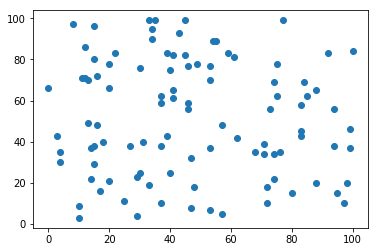

In [67]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

In [70]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

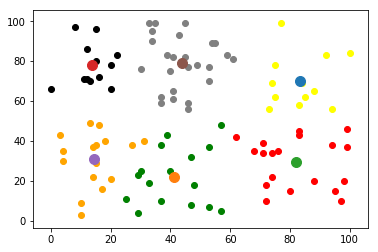

In [72]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是对真实世界的抽象。“所有的模型都是错误的”是指模型只是对真实世界的外在表现进行的函数拟合，并不代表模型描述了真实世界的内在运行逻辑。“有些模型是有用的”是指模型在对真实世界进行预测时的精度达到了人们使用场景的要求，那就是有用的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合是训练集和验证集的误差都较大。过拟合是训练集误差较小，但验证集误差较大。  
欠拟合的原因可能有：模型选择不合理；模型太简单（比如特征量少）；训练数据量太小；超参数设置不合理；训练轮次不足；等等。  
过拟合的原因可能有：特征量太多；模型太复杂；数据噪声太大；等等。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:  
precision：所有预测结果为“是”且预测正确的数量 / 预测结果为“是”的总数。用于判断预测精度，主要是用在正负样本分布比较均匀的场合。  
recall: 所有预测结果为“是”且预测正确的数量 / 所有真正标签为“是”的总数。使用场合是，我们关注正样本是否被检测出，对负样本被检测为正样本的这种错误有一定的容忍度。  
AUC: AUC是ROC曲线之下与x坐标轴之间围成的面积。ROC曲线是（正阳率，伪阳率）的坐标点连成的。主要用于正负样本非常不均匀的场合。比如负样本比例过低，只要全部预测为正就可以有较高的精度及召回率。AUC就可以识别这种看似高效实则没意义的算法。指标希望能尽可能识别出真正的正样本，也希望尽可能少地将负样本识别为正样本。  
F Score：precision和recall通常是难以兼得的，调参导致其中一个指标上升很可能导致另一个指标下降。F Score是将这两个指标在评价时权衡。  
$$ F Score = (1+\beta ^{2})\frac{precision*recall}{\beta ^{2}precision+recall} $$
F1: beta值为1，precision和recall权重相同，都很重要。  
F2：beta值为2，precision比recall权重高。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 传统分析式编程是需要人工分析数据，获得关键参数，写成代码，比如分类规则、数据的预测函数等等。机器学习是由人来设计计算模型，给定数据后，由机器来计算出分类规则、预测函数等等。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:正确。模型的选择对于机器学习的结果是非常重要的。判断模型的好坏，取决于评价标准。评价标准的选择，又是基于对需求场景的了解。从真实的应用场景出发，判断各类标准中哪个标准最贴近需求，然后选择这个标准来选择模型和调优，就能得到相对比较满意的结果。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [140]:
from collections import Counter
from icecream import ic
class my_decision_tree(object):    
    def __init__(self):
        # 初始化模型数据
        self.data = []
    
    def entropy_2(self, elements):
        '''群体的混乱程度'''
        counter = Counter(elements)
        probs = [counter[c] / len(elements) for c in set(elements)]
        return - sum(p * np.log(p) for p in probs)
    
    def find_the_optimal_spliter_2(self, training_data: pd.DataFrame, target: str) -> str:
        # 用于分类的列名
        x_fields = set(training_data.columns.tolist()) - {target}

        spliter = None
        # 初始化为最大值
        min_entropy = float('inf')

        for f in x_fields:
            values = set(training_data[f])
            for v in values:
                # f列值为v的标签值
                sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
                entropy_1 = entropy(sub_spliter_1)
                # f列值不为v的标签值
                sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
                entropy_2 = entropy(sub_spliter_2)
                # 计算以f列的v值分类后的熵
                entropy_v = entropy_1 + entropy_2
                # 保留最小熵以及对应的列名和值
                if entropy_v <= min_entropy:
                    min_entropy = entropy_v
                    spliter = (f, v)
        return spliter
    
    def get_optimal_spliter_2(self, training_data: pd.DataFrame, target: str):
        if entropy(training_data[target]) == 0 or len(training_data.columns.tolist()) == 1:
            # 熵为0无需再分割，或列为1无法再分割
            return training_data.reset_index().loc[0,target]
        f,v = self.find_the_optimal_spliter_2(training_data, target)
        
        dataset1 = training_data[training_data[f] == v]
        result1 = self.get_optimal_spliter_2(dataset1.drop([f], axis=1), target)
        
        dataset2 = training_data[training_data[f] != v]
        result2 = self.get_optimal_spliter_2(dataset2.drop([f], axis=1), target)
        
        return [f, v, result1, result2]
    
    def fit(self, training_data: pd.DataFrame, target: str):
        self.data = self.get_optimal_spliter_2(training_data, target)
        return
    
    def predict(self, input_dict):
        # 数据结构为：list，下标0表示列名，下标1表示值，下标2表示等于这个值时的标签（或嵌套下一个list）
        # 下标3表示不等于这个值时的标签（或嵌套下一个list）
        data = self.data
        while(isinstance(data, list)):
            f = data[0]
            v = data[1]
            if v == input_dict[f]:
                data = data[2]
            else:
                data = data[3]
        return data

In [77]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [148]:
dt = my_decision_tree()
dt.fit(dataset, 'bought')
result = dt.predict({'gender':'M', 'income':'+10', 'family_number':1})
print('label is:', result)
result = dt.predict({'gender':'M', 'income':'-10', 'family_number':1})
print('label is:', result)

label is: 0
label is: 1


In [146]:
dt.data

['family_number', 2, 1, ['income', '-10', 1, ['gender', 'M', 0, 1]]]

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [149]:
# you code here
from sklearn.datasets import load_boston
import random

dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [150]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [152]:
X_rm = x[:,5]
X_rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

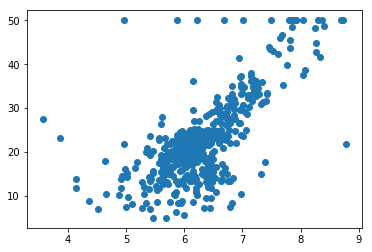

In [162]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

In [154]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [155]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [156]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient += - x_i
        else:
            gradient += x_i
    return 1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient += - 1
        else:
            gradient += 1
    return 1/n * gradient

In [170]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-2

iteration_num = 2000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 322.0661170938671, parameters k is -38.55061529216446 and b is -57.256788251050224
Iteration 1, the loss is 321.6611508000401, parameters k is -38.48776894829094 and b is -57.246788251050226
Iteration 2, the loss is 321.25618450621323, parameters k is -38.424922604417425 and b is -57.23678825105023
Iteration 3, the loss is 320.8512182123867, parameters k is -38.36207626054391 and b is -57.22678825105023
Iteration 4, the loss is 320.44625191855954, parameters k is -38.29922991667039 and b is -57.21678825105023
Iteration 5, the loss is 320.04128562473306, parameters k is -38.236383572796875 and b is -57.206788251050234
Iteration 6, the loss is 319.63631933090596, parameters k is -38.17353722892336 and b is -57.196788251050236
Iteration 7, the loss is 319.231353037079, parameters k is -38.11069088504984 and b is -57.18678825105024
Iteration 8, the loss is 318.8263867432523, parameters k is -38.047844541176325 and b is -57.17678825105024
Iteration 9, the loss is 31

Iteration 317, the loss is 193.69180195075995, parameters k is -18.628324284259655 and b is -54.086788251050855
Iteration 318, the loss is 193.2868356569329, parameters k is -18.56547794038614 and b is -54.07678825105086
Iteration 319, the loss is 192.8818693631062, parameters k is -18.50263159651262 and b is -54.06678825105086
Iteration 320, the loss is 192.47690306927933, parameters k is -18.439785252639105 and b is -54.05678825105086
Iteration 321, the loss is 192.0719367754524, parameters k is -18.376938908765588 and b is -54.04678825105086
Iteration 322, the loss is 191.6669704816258, parameters k is -18.31409256489207 and b is -54.036788251050865
Iteration 323, the loss is 191.2620041877989, parameters k is -18.251246221018555 and b is -54.02678825105087
Iteration 324, the loss is 190.85703789397226, parameters k is -18.188399877145038 and b is -54.01678825105087
Iteration 325, the loss is 190.45207160014513, parameters k is -18.12555353327152 and b is -54.00678825105087
Iteratio

Iteration 720, the loss is 30.490385538542036, parameters k is 6.698752296768065 and b is -50.05678825105166
Iteration 721, the loss is 30.0854192447152, parameters k is 6.761598640641583 and b is -50.04678825105166
Iteration 722, the loss is 29.68045295088834, parameters k is 6.8244449845151 and b is -50.03678825105166
Iteration 723, the loss is 29.275486657061524, parameters k is 6.887291328388618 and b is -50.02678825105166
Iteration 724, the loss is 28.870520363234625, parameters k is 6.9501376722621355 and b is -50.016788251051665
Iteration 725, the loss is 28.46555406940779, parameters k is 7.012984016135653 and b is -50.00678825105167
Iteration 726, the loss is 28.060587775580988, parameters k is 7.075830360009171 and b is -49.99678825105167
Iteration 727, the loss is 27.65562148175416, parameters k is 7.138676703882688 and b is -49.98678825105167
Iteration 728, the loss is 27.250655187927308, parameters k is 7.201523047756206 and b is -49.97678825105167
Iteration 729, the loss 

Iteration 1009, the loss is 4.520195214576709, parameters k is 11.448644648546729 and b is -49.26350761864073
Iteration 1010, the loss is 4.520192166252911, parameters k is 11.448558146570445 and b is -49.263349515873934
Iteration 1011, the loss is 4.520190251953877, parameters k is 11.448721130760168 and b is -49.26315188741543
Iteration 1012, the loss is 4.5201870040462016, parameters k is 11.448634628783884 and b is -49.262993784648636
Iteration 1013, the loss is 4.520183756138525, parameters k is 11.4485481268076 and b is -49.26283568188184
Iteration 1014, the loss is 4.520180508230844, parameters k is 11.448461624831316 and b is -49.26267757911504
Iteration 1015, the loss is 4.520178745306911, parameters k is 11.448375122855031 and b is -49.262519476348245
Iteration 1016, the loss is 4.5201755456080095, parameters k is 11.448538107044754 and b is -49.262321847889744
Iteration 1017, the loss is 4.520172297700331, parameters k is 11.44845160506847 and b is -49.26216374512295
Iterati

Iteration 1350, the loss is 4.519213399845463, parameters k is 11.43960534024643 and b is -49.206353468443275
Iteration 1351, the loss is 4.519210151937789, parameters k is 11.439518838270146 and b is -49.20619536567648
Iteration 1352, the loss is 4.519208249311623, parameters k is 11.439432336293862 and b is -49.20603726290968
Iteration 1353, the loss is 4.519205189314954, parameters k is 11.439595320483585 and b is -49.20583963445118
Iteration 1354, the loss is 4.519201941407279, parameters k is 11.439508818507301 and b is -49.205681531684384
Iteration 1355, the loss is 4.519198693499599, parameters k is 11.439422316531017 and b is -49.20552342891759
Iteration 1356, the loss is 4.519196543080778, parameters k is 11.439335814554733 and b is -49.20536532615079
Iteration 1357, the loss is 4.519193730876767, parameters k is 11.439498798744456 and b is -49.20516769769229
Iteration 1358, the loss is 4.519190482969091, parameters k is 11.439412296768172 and b is -49.20500959492549
Iteration

Iteration 1662, the loss is 4.51831661118177, parameters k is 11.431581822459957 and b is -49.15402145263316
Iteration 1663, the loss is 4.5183133632740855, parameters k is 11.431495320483673 and b is -49.15386334986636
Iteration 1664, the loss is 4.5183101153664085, parameters k is 11.43140881850739 and b is -49.153705247099566
Iteration 1665, the loss is 4.518306867458731, parameters k is 11.431322316531105 and b is -49.15354714433277
Iteration 1666, the loss is 4.518303619551059, parameters k is 11.431235814554821 and b is -49.15338904156597
Iteration 1667, the loss is 4.518300371643381, parameters k is 11.431149312578537 and b is -49.153230938799176
Iteration 1668, the loss is 4.518297931544047, parameters k is 11.431062810602253 and b is -49.15307283603238
Iteration 1669, the loss is 4.518295409020544, parameters k is 11.431225794791976 and b is -49.15287520757388
Iteration 1670, the loss is 4.518292161112868, parameters k is 11.431139292815692 and b is -49.15271710480708
Iteratio

Iteration 1933, the loss is 4.517535916723685, parameters k is 11.424264609021325 and b is -49.10864595856228
Iteration 1934, the loss is 4.517532668816011, parameters k is 11.42417810704504 and b is -49.10848785579548
Iteration 1935, the loss is 4.51752942090833, parameters k is 11.424091605068757 and b is -49.108329753028684
Iteration 1936, the loss is 4.517527480920489, parameters k is 11.424005103092473 and b is -49.10817165026189
Iteration 1937, the loss is 4.517524494185527, parameters k is 11.424172237479825 and b is -49.107974021803386
Iteration 1938, the loss is 4.517521246277854, parameters k is 11.42408573550354 and b is -49.10781591903659
Iteration 1939, the loss is 4.51751799837017, parameters k is 11.423999233527256 and b is -49.10765781626979
Iteration 1940, the loss is 4.517515745384005, parameters k is 11.423912731550972 and b is -49.107499713502996
Iteration 1941, the loss is 4.517513071647367, parameters k is 11.424079865938324 and b is -49.107302085044495
Iteration 

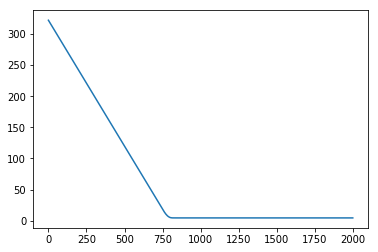

In [171]:
plt.plot(list(range(iteration_num)),losses)

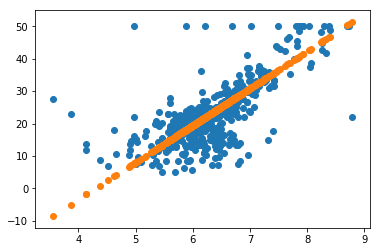

In [172]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)